# Get Data

Fragen:
- kann LeWagon einen Meddra-Account machen?
- ohne meddra könnte man die hierachie händisch machen, dauert zu lange, fehleranfällig, sinnvoll?
- Diskrepanz zwischen medical terms und language used in reviews --> wie viel sinn macht das überhaupt?
- kann man diese informationen auch für enbeddings nutzen?

In [1]:
import pandas as pd
import numpy as np

In [52]:
Dummy_side_effects0= {
    'abdominal': ['constipation', 'diarrhea'],
    'skin' : ['rash'],
    'vertigo' : ['dizziness', 'drowsiness'],
    'headache' : ['headache'],
    'mood disorders' : ['insomnia', 'mood swings']}

# Lieber so:
Dummy_side_effects= {
    'constipation': 'abdominal',
    'diarrhea' : 'abdominal',
    'rash' : 'skin',
    'dizziness' : 'vertigo',
    'drowsiness' : 'vertigo',
    'headache' : 'headache',
    'insomnia' : 'mood disorders',
    'mood swings' : 'mood disorders'}

In [20]:
df = pd.read_table('../raw_data/meddra.tsv', header=None)
df.columns = ["UMLS_ID", "MedDRA_Term", "MedDRA_ID", "Side_Effect"]

In [31]:
df.head()

,UMLS_ID,MedDRA_Term,MedDRA_ID,Side_Effect
0,C0000727,LT,10000647,Acute abdomen
1,C0000727,PT,10000647,Acute abdomen
2,C0000727,LT,10042784,Syndrome abdominal acute
3,C0000727,LT,10000096,Abdominal syndrome acute
4,C0000729,LT,10000057,Abdominal cramps


In [41]:
df_pt = df[df['MedDRA_Term'] == 'PT']
df_pt.shape

(20307, 4)

In [44]:
df_pt.head(5)

,UMLS_ID,MedDRA_Term,MedDRA_ID,Side_Effect
1,C0000727,PT,10000647,Acute abdomen
12,C0000731,PT,10000060,Abdominal distension
17,C0000734,PT,10000077,Abdominal mass
22,C0000735,PT,10060925,Abdominal neoplasm
27,C0000737,PT,10000081,Abdominal pain


In [57]:
df_pt = df_pt.sort_values(by='UMLS_ID')

In [59]:
df_pt.head(10)

,UMLS_ID,MedDRA_Term,MedDRA_ID,Side_Effect
1,C0000727,PT,10000647,Acute abdomen
12,C0000731,PT,10000060,Abdominal distension
17,C0000734,PT,10000077,Abdominal mass
22,C0000735,PT,10060925,Abdominal neoplasm
27,C0000737,PT,10000081,Abdominal pain
34,C0000766,PT,10048065,X-ray abnormal
46,C0000768,PT,10060919,Foetal malformation
40,C0000768,PT,10010356,Congenital anomaly
55,C0000772,PT,10028182,Multiple congenital abnormalities
58,C0000774,PT,10061165,Gastrin secretion disorder


# Frequent ADR from medical data

In [127]:
df_frequent = pd.read_table('../raw_data/meddra_freq.tsv', header=None)
df_frequent.columns = ["ID_1", "ID_2","UMLS_ID", "placebo", "frequency", "lower", "upper", "MedDRA_Term", "UMLS_ID2", "Side_Effect"]

In [131]:
df_frequent = df_frequent.drop(["ID_1", "ID_2", "placebo"], axis=1)
df_frequent.head()

,UMLS_ID,frequency,lower,upper,MedDRA_Term,UMLS_ID2,Side_Effect
0,C0000737,21%,0.21,0.21,LLT,C0000737,Abdominal pain
1,C0000737,21%,0.21,0.21,PT,C0000737,Abdominal pain
2,C0000737,21%,0.21,0.21,PT,C0687713,Gastrointestinal pain
3,C0000737,5%,0.05,0.05,LLT,C0000737,Abdominal pain
4,C0000737,5%,0.05,0.05,PT,C0000737,Abdominal pain


In [132]:
# Number of unique Side Effects in meddra_freq
df_frequent.Side_Effect.unique().shape

(3964,)

In [133]:
# Select only Side Effects with occurance > 5%
temp = df_frequent[df_frequent.upper > 0.05].sort_values(by='upper', ascending=False)

In [182]:
temp.Side_Effect.unique().shape

(1612,)

In [121]:
pd.DataFrame(temp).to_csv('../raw_data/frequent_adr.csv', index = False)

## Frequent ADR in Dataset

In [154]:
df = pd.read_csv('../raw_data/adr_labelled_data.csv', nrows=300)
df.head(st)

,uniqueID,drugName,condition,review,rating,date,usefulCount,sideEffect,Unnamed: 8
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil""",9,20-May-12,27,0,NaN
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of Intuniv. We became concerned when he began this la...",8,27-Apr-10,192,1,NaN
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very li...",5,14-Dec-09,17,1,NaN
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth control. I&#039;m glad I went with the patch, I h...",8,3-Nov-15,10,1,NaN
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job ...",9,27-Nov-16,37,1,NaN
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard erections however experianced headache, lower bow...",2,28-Nov-15,43,1,NaN
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I took the Plan B 26 hours later, and took a pregnanc...",1,7-Mar-17,5,1,NaN
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abil...",10,14-Mar-15,32,1,NaN
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Keppera : constant shaking in my arms &amp; legs &amp;...",1,9-Aug-16,11,1,NaN
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effec...",8,8-Dec-16,1,0,NaN


In [177]:
pd.options.display.max_colwidth = 100
real_se = df[['drugName','Unnamed: 8']].iloc[100:]
real_se.iloc[190:200]

,drugName,Unnamed: 8
290,Acetaminophen / oxycodone,NaN
291,Levonorgestrel,"gained 40-50 pounds, no energy, no sex drive"
292,Monistat 7,uncomfortable
293,Ethinyl estradiol / norgestimate,"nauseous, migraines, depression, sweating, num arm"
294,Pramipexole,"Tired, can’t think straight"
295,Ethinyl estradiol / norgestimate,"no drive for sex. moody, cry constantly. period heavy and unpredictable"
296,AndroGel,bit more aggressive
297,Ethinyl estradiol / norgestimate,"Gained 5 pounds, super decreased limbo"
298,Victoza,NaN
299,Ethinyl estradiol / norgestimate,swelling and tenderness in the chest


In [161]:
real_se.iloc[140]

drugName      Gabapentin
Unnamed: 8           NaN
Name: 240, dtype: object

headache : headache, migrane, migranes, headaches
pain: pain, leg pain, back pain, arm pain, cramps, tendonitis, pain in joints

skin: sensitive skin, dry skin, burned, red, dryness, swollen, itchy, irritated, bumpy spots, peeling, chapped lips, acne, burning, itching, lost sensation, swollen, lips like sandpaper

libido: sex drive decreased, lower sex drive, decreased libido

depression: anhedonia, depression, mood swings, moody, weepy, no feelings, feeling, crying, cry constantly

anxiety: jaw clenching, inability to sit still, bad dreams, hear internal voices, paranoid, anxious, scared to be alone, suppressed, ability to sleep, manic state, anxiety, insomnia, yawning, little confused, cognitive problems, irritable, angry, unreasonable, nightmare, nightmares, can't think straight, aggressive

gastro-intestinal: diarrhoea, stomach cramps, heartburn, nauseated, no appetite, nausea, appetite suppressed, bowel movements, constipation, constipated, upset stomach, bloating, passing winds, acidy burbs, stomach aches, nauseous, sour stomach

gynecological: brown periods, spot, spotting, bleeding lasted, increased discharge, longer periods, cramping, burning, itching, heavy periods, swelling chest, tenderness in chest

discomfort: shakiness, shaky, tired, fatigue, breathlessness, dry mouth, no energy, cold, hot flashes,  night sweats, shaking, dizziness, knocks me out, weakness, wheezy, tiredness, uncomfortable, sweating

weight gain: weight gain, gaining weight, hungry, appetite increased

eyes: burning eyes, blurred vision, blurry vision, extreme light sensitivity

other: hair loss, strange taste in mouth, dry mouth, weight loss, sneeze, zero appetite
    

In [178]:
real_se_dict = {
    'headache' : 'pain', 
    'migrane' : 'pain', 
    'migranes' : 'pain', 
    'headaches' : 'pain',
    'pain' : 'pain', 
    'leg pain' : 'pain', 
    'back pain' : 'pain', 
    'arm pain' : 'pain', 
    'cramps' : 'pain', 
    'tendonitis' : 'pain', 
    'pain in joints' : 'pain',
    
    'sensitive skin' : 'skin', 
    'dry skin' : 'skin', 
    'burned' : 'skin', 
    'red' : 'skin', 
    'dryness' : 'skin', 
    'swollen' : 'skin', 
    'itchy' : 'skin', 
    'irritated' : 'skin', 
    'bumpy spots' : 'skin', 
    'peeling' : 'skin', 
    'chapped lips' : 'skin', 
    'acne' : 'skin', 
    'burning' : 'skin', 
    'itching' : 'skin', 
    'lost sensation' : 'skin', 
    'swollen' : 'skin',
    
    'sex drive decreased': 'libido', 
    'lower sex drive' : 'libido', 
    'decreased libido' : 'libido',
    'loss of libido' : 'libido',
    
    'anhedonia' : 'depression', 
    'depression' : 'depression', 
    'mood swings' : 'depression', 
    'moody' : 'depression', 
    'weepy' : 'depression', 
    'no feelings' : 'depression', 
    'feeling' : 'depression', 
    'crying' : 'depression', 
    'cry constantly' : 'depression',
    
    'jaw clenching' : 'anxiety', 
    'inability to sit still' : 'anxiety', 
    'hear internal voices' : 'anxiety', 
    'paranoid' : 'anxiety', 
    'anxious' : 'anxiety', 
    'scared to be alone' : 'anxiety', 
    'manic state' : 'anxiety', 
    'anxiety' : 'anxiety', 
    'little confused' : 'anxiety', 
    'cognitive problems' : 'anxiety', 
    'irritable' : 'anxiety', 
    'angry' : 'anxiety', 
    'unreasonable' : 'anxiety', 
    'can not think straight' : 'anxiety', 
    'aggressive' : 'anxiety',
    'nightmare' : 'anxiety', 
    'nightmares' : 'anxiety', 
    'yawning' : 'anxiety', 
    'bad dreams' : 'anxiety', 
    'inability to sleep' : 'anxiety', 
    'insomnia' : 'anxiety', 
    
    'gastro-intestinal' : 'gastro-intestinal',
    'diarrhoea' : 'gastro-intestinal', 
    'stomach cramps' : 'gastro-intestinal', 
    'heartburn' : 'gastro-intestinal', 
    'nauseated' : 'gastro-intestinal', 
    'no appetite' : 'gastro-intestinal', 
    'nausea' : 'gastro-intestinal', 
    'appetite suppressed' : 'gastro-intestinal', 
    'bowel movements' : 'gastro-intestinal', 
    'constipation' : 'gastro-intestinal', 
    'constipated' : 'gastro-intestinal', 
    'upset stomach' : 'gastro-intestinal', 
    'bloating' : 'gastro-intestinal', 
    'passing winds' : 'gastro-intestinal', 
    'acidy burbs' : 'gastro-intestinal', 
    'stomach aches' : 'gastro-intestinal', 
    'nauseous' : 'gastro-intestinal', 
    'sour stomach' : 'gastro-intestinal',
    
    'discomfort' : 'discomfort',
    'shakiness' : 'discomfort', 
    'shaky' : 'discomfort', 
    'tired' : 'discomfort', 
    'fatigue' : 'discomfort', 
    'breathlessness' : 'discomfort', 
    'dry mouth' : 'discomfort', 
    'no energy' : 'discomfort', 
    'cold' : 'discomfort', 
    'hot flashes' : 'discomfort',  
    'night sweats' : 'discomfort', 
    'shaking' : 'discomfort', 
    'dizziness' : 'discomfort', 
    'knocks me out' : 'discomfort', 
    'weakness' : 'discomfort', 
    'wheezy' : 'discomfort', 
    'tiredness' : 'discomfort', 
    'uncomfortable' : 'discomfort', 
    'sweating' : 'discomfort',
    
    'brown periods' : 'gynecological', 
    'spot' : 'gynecological', 
    'spotting' : 'gynecological', 
    'bleeding lasted' : 'gynecological', 
    'increased discharge' : 'gynecological', 
    'longer periods' : 'gynecological', 
    'cramping' : 'gynecological', 
    'burning' : 'gynecological', 
    'itching' : 'gynecological', 
    'heavy periods' : 'gynecological', 
    'swelling chest' : 'gynecological', 
    'tenderness in chest' : 'gynecological',
    
    'weight gain' : 'weight gain', 
    'gaining weight' : 'weight gain', 
    'hungry' : 'weight gain', 
    'appetite increased' : 'weight gain',

    'burning eyes' : 'eyes', 
    'blurred vision' : 'eyes', 
    'blurry vision' : 'eyes', 
    'light sensitivity' : 'eyes'}

In [184]:
real_se_domains: ['pain', 'skin', 'libido', 'depression', 'anxiety', 'gastro-intestinal', 'discomfort', 'gynecological', 'weight gain', 'eyes']

In [188]:
real_se_dict.info()

AttributeError: 'dict' object has no attribute 'info'

In [191]:
dummy_data = {'drug' : ['Tylenol', 'Cialis', 'Ibuprofen', 'Benadril', 'Claritin'],
        'condition' : ['pain', 'ed', 'pain', 'allergy', 'allergy'],
       'headache' : [2, 4, 0, 1, 0],
       'nausea' : [0, 1, 1, 1, 0],
       'dizzy' : [0, 2, 1, 1, 0],
       'death' : [1, 0, 1, 2, 20]}
dummy_df = pd.DataFrame(dummy_data, columns = dummy_data.keys())

In [192]:
dummy_df

,drug,condition,headache,nausea,dizzy,death
0,Tylenol,pain,2,0,0,1
1,Cialis,ed,4,1,2,0
2,Ibuprofen,pain,0,1,1,1
3,Benadril,allergy,1,1,1,2
4,Claritin,allergy,0,0,0,20


In [197]:
singlesample = pd.DataFrame(dummy_df.iloc[0]).transpose()
singlesample

,drug,condition,headache,nausea,dizzy,death
0,Tylenol,pain,2,0,0,1


In [235]:
secondsample = dummy_df.loc[[0]]
secondsample

,drug,condition,headache,nausea,dizzy,death
0,Tylenol,pain,2,0,0,1


In [201]:
singlesample.columns

Index(['drug', 'condition', 'headache', 'nausea', 'dizzy', 'death'], dtype='object')

In [237]:
dummy_df.loc[0,'drug']

'Tylenol'

In [240]:
def make_dicks(pandas):
    row = {}
    for column in pandas.columns:
        row[f'{column}'] = pandas.loc[0,f'{column}']
    return row

In [315]:
dick = make_dicks(singlesample)
dick

{'drug': 'Tylenol',
 'condition': 'pain',
 'headache': 2,
 'nausea': 0,
 'dizzy': 0,
 'death': 1}

In [244]:
dummy_df.columns

Index(['drug', 'condition', 'headache', 'nausea', 'dizzy', 'death'], dtype='object')

In [245]:
make_dicks(dummy_df)

{'drug': 'Tylenol',
 'condition': 'pain',
 'headache': 2,
 'nausea': 0,
 'dizzy': 0,
 'death': 1}

In [254]:
for row in range(5):
    print(row)
    secondsample = dummy_df.loc[row,]
    dick = make_dicks(secondsample)
    print(dick)

0


AttributeError: 'Series' object has no attribute 'columns'

## Visualisation

In [255]:
dummy_df

,drug,condition,headache,nausea,dizzy,death
0,Tylenol,pain,2,0,0,1
1,Cialis,ed,4,1,2,0
2,Ibuprofen,pain,0,1,1,1
3,Benadril,allergy,1,1,1,2
4,Claritin,allergy,0,0,0,20


In [256]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

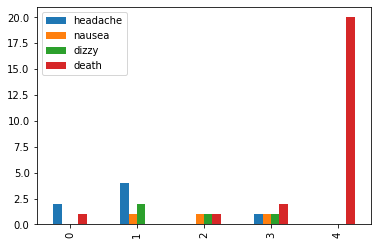

In [258]:
dummy_df.plot(kind='bar')

In [264]:
sideeffect_df = dummy_df.drop(['drug', 'condition'], axis=1)
sideeffect_df.index = dummy_df['drug']
sideeffect_df

,headache,nausea,dizzy,death
drug,,,,
Tylenol,2,0,0,1
Cialis,4,1,2,0
Ibuprofen,0,1,1,1
Benadril,1,1,1,2
Claritin,0,0,0,20


In [317]:
input = 'Tylenol'
sideeffect_df.loc[input]

headache    2
nausea      0
dizzy       0
death       1
Name: Tylenol, dtype: int64

<AxesSubplot:>

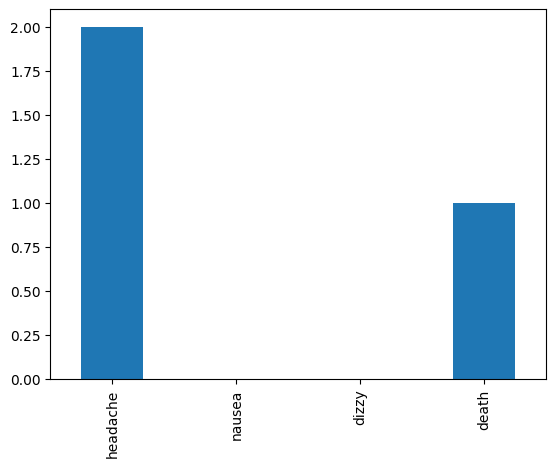

In [289]:
sideeffect_df.loc[input].plot(kind='bar')

range(0, 4)

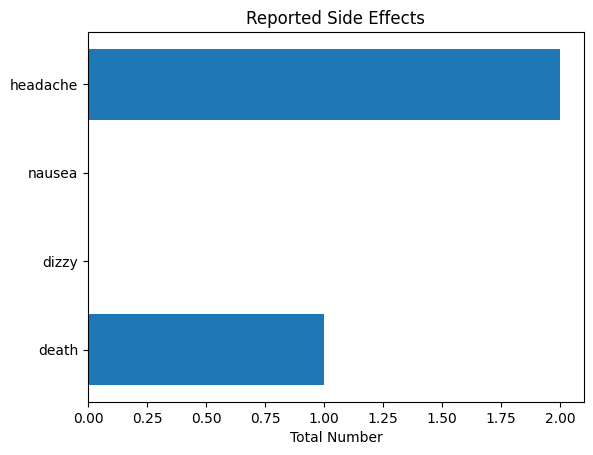

In [311]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
y_pos = len(sideeffect_df.columns)
se_names = sideeffect_df.columns
group_data

ax.barh(group_names, group_data, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(side_effects)

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Total Number')
ax.set_title('Reported Side Effects')

plt.show()


#ax.barh(group_names, group_data)
#['headache', 'nausea', 'dizzy', 'death'][2, 0, 0, 1]

In [306]:
del dick['condition']

In [316]:
group_data = list(dick.values())[2:]
group_names = list(dick.keys())[2:]

print(group_data, group_names)

[2, 0, 0, 1] ['headache', 'nausea', 'dizzy', 'death']


Text(0.5, 1.0, 'Reported Side Effects')

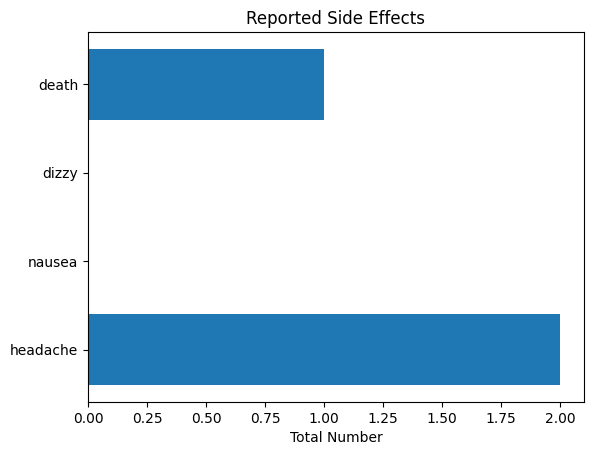

In [323]:
fig, ax = plt.subplots()
ax.barh(group_names, group_data)

ax.set_xlabel('Total Number')
ax.set_title('Reported Side Effects')